# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load the data into a DataFrame
# pd.read_csv()

## Transform the dates if needed, e.g.
# df["Date"] = pd.to_datetime(df["Date"], format="%m-%d-%y")

## Import Liquor Sales Data

In [5]:
df = pd.read_csv('./../Iowa_Liquor_sales_sample_10pct.csv')

In [250]:
df.head(10)

date  store_number          city  zip_code       county  category  \
0 2015-11-04          3717        SUMNER     50674       Bremer   1051100   
1 2016-03-02          2614     DAVENPORT     52807        Scott   1011100   
2 2016-02-11          2106   CEDAR FALLS     50613   Black Hawk   1011200   
3 2016-02-03          2501          AMES     50010        Story   1071100   
4 2015-08-18          3654       BELMOND     50421       Wright   1031080   
5 2015-04-20          2569  CEDAR RAPIDS     52402         Linn   1041100   
6 2015-08-05          2596       OTTUMWA     52501      Wapello   1051010   
7 2015-06-25          3456    CLEAR LAKE     50428  Cerro Gordo   1012100   
8 2016-01-04          4757     BONDURANT     50035         Polk   1032080   
9 2015-11-10          4346    SHELLSBURG     52332       Benton   1081315   

               category_name  item_number              item_description  \
0           APRICOT BRANDIES        54436     Mr. Boston Apricot Brandy   
1           BLENDED WHISKIES        27605                       Tin Cup   
2  STRAIGHT BOURBON WHISKIES        19067                      Jim Beam   
3         AMERICAN COCKTAILS        59154       1800 Ultimate Margarita   
4             VODKA 80 PROOF        35918            Five O'clock Vodka   
5          AMERICAN DRY GINS        31473             New Amsterdam Gin   
6    AMERICAN GRAPE BRANDIES        52806                 Korbel Brandy   
7          CANADIAN WHISKIES        10628          Canadian Club Whisky   
8             IMPORTED VODKA        34006  Absolut Swedish Vodka 80 Prf   
9          CINNAMON SCHNAPPS        82610            Dekuyper Hot Damn!   

   bottle_volume_ml   ...    state_bottle_retail  bottles_sold  sales_dollars  \
0               750   ...                   6.75            12          81.00   
1               750   ...                  20.63             2          41.26   
2              1000   ...                  18.89            24         453.36   
3              1750   ...                  14.25             6          85.50   
4              1750   ...                  10.80            12         129.60   
5              1750   ...                  19.98             6         119.88   
6               750   ...                   9.99             3          29.97   
7              1750   ...                  23.63             2          47.26   
8               750   ...                  17.24             4          68.96   
9              1000   ...                  11.43             2          22.86   

   volume_sold_liters  volume_sold_gallons  cost_per_liter  cost_per_gallon  \
0                9.00                 2.38        2.000000         0.528889   
1                1.50                 0.40        0.109091         0.029091   
2               24.00                 6.34        1.906275         0.503574   
3               10.50                 2.77        1.105263         0.291579   
4               21.00                 5.55        2.916667         0.770833   
5               10.50                 2.77        0.788288         0.207958   
6                2.25                 0.59        0.337838         0.088589   
7                3.50                 0.92        0.222222         0.058413   
8                3.00                 0.79        0.261097         0.068755   
9                2.00                 0.53        0.262467         0.069554   

   margin  broad_category quarter  
0   27.00          brandy      Q4  
1   13.76         whiskey      Q1  
2  151.20         whiskey      Q1  
3   28.50            misc      Q1  
4   43.20           vodka      Q3  
5   39.96             gin      Q2  
6    9.99          brandy      Q3  
7   15.76         whiskey      Q2  
8   23.00           vodka      Q1  
9    7.62        schnapps      Q4  

[10 rows x 21 columns]

In [7]:
df.columns

Index([u'Date', u'Store Number', u'City', u'Zip Code', u'County Number',
       u'County', u'Category', u'Category Name', u'Vendor Number',
       u'Item Number', u'Item Description', u'Bottle Volume (ml)',
       u'State Bottle Cost', u'State Bottle Retail', u'Bottles Sold',
       u'Sale (Dollars)', u'Volume Sold (Liters)', u'Volume Sold (Gallons)'],
      dtype='object')

In [8]:
df.rename(columns={
                   'Date':'date',
                   'Store Number':'store_number',
                   'City':'city',
                   'Zip Code':'zip_code',
                   'County Number':'county_number',
                   'County':'county',
                   'Category':'category',
                   'Category Name':'category_name',
                   'Vendor Number':'vendor_name',
                   'Item Number':'item_number',
                   'Item Description':'item_description',
                   'Bottle Volume (ml)': 'bottle_volume_ml',
                   'State Bottle Cost':'state_bottle_cost',
                   'State Bottle Retail':'state_bottle_retail',
                   'Bottles Sold':'bottles_sold',
                   'Sale (Dollars)':'sales_dollars',
                   'Volume Sold (Liters)':'volume_sold_liters',
                   'Volume Sold (Gallons)':'volume_sold_gallons'
                  }, inplace=True)

In [9]:
del df['vendor_name']
del df['county_number']

In [10]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 16 columns):
date                   270955 non-null object
store_number           270955 non-null int64
city                   270955 non-null object
zip_code               270955 non-null object
county                 269878 non-null object
category               270887 non-null float64
category_name          270323 non-null object
item_number            270955 non-null int64
item_description       270955 non-null object
bottle_volume_ml       270955 non-null int64
state_bottle_cost      270955 non-null object
state_bottle_retail    270955 non-null object
bottles_sold           270955 non-null int64
sales_dollars          270955 non-null object
volume_sold_liters     270955 non-null float64
volume_sold_gallons    270955 non-null float64
dtypes: float64(3), int64(4), object(9)
memory usage: 33.1+ MB


(270955, 16)

In [11]:
# Remove $ from certain columns
cols = ["state_bottle_cost", "state_bottle_retail", "sales_dollars"]

for col in cols:
    df[col] = df[col].apply(lambda x: float(x[1:]))

In [12]:
df['cost_per_liter'] = (df['volume_sold_liters']) / (df['state_bottle_cost'])
df['cost_per_gallon'] = (df['volume_sold_gallons']) / (df['state_bottle_cost'])
df['margin'] = (df['state_bottle_retail'] - df['state_bottle_cost']) * df['bottles_sold']

In [13]:
# Convert date string to datetime object
df['date'] = pd.to_datetime(df['date'], format="%m/%d/%Y")

In [14]:
# Drop or replace bad values
df = df.dropna()

In [15]:
df['zip_code'] = pd.to_numeric(df['zip_code'], errors=coerce)

In [16]:
df['zip_code'].fillna(51529, inplace=True)

In [17]:
# Convert integers
#df['county_number'] = df['county_number'].astype(int)
df['category'] = df['category'].astype(int)
df['zip_code'] = df['zip_code'].astype(int)

In [18]:
# Function to make alcohol category series
def make_broad_category(x):
   x = x.lower()
   if 'liqueur' in x:
       return 'liqueur'
   elif 'whisk' in x or 'scotch' in x:
       return 'whiskey'
   elif 'vodka' in x:
       return 'vodka'
   elif 'gin' in x:
       return 'gin'
   elif 'tequila' in x:
       return 'tequila'
   elif 'schnapps' in x:
       return 'schnapps'
   elif 'rum' in x:
       return 'rum'
   elif 'brandies' in x:
       return 'brandy'
   elif 'creme' in x:
       return 'creme'
   elif 'beer' in x:
       return 'beer'
   elif 'amaretto' in x:
       return 'amaretto'
   elif 'anisette' in x:
       return 'anisette'
   else:
       return 'misc'
   
df['broad_category'] = df['category_name'].map(make_broad_category)

In [19]:
# Function to categorize quarters
def quarter(date):
    if date.month <= 3:
        return 'Q1'
    elif date.month <=6:
        return 'Q2'
    elif date.month <=9:
        return 'Q3'
    elif date.month <=12:
        return 'Q4'

df['quarter'] = df['date'].apply(quarter) 

In [20]:
# Filter by our start and end dates
#df.sort_values(by=['store_number', 'date'], inplace=True)
start_date = pd.Timestamp('20150101')
end_date = pd.Timestamp('20151231')

In [21]:
# Create booleans of start date and end date for 2015
mask = (df['date'] >= start_date) & (df['date'] <= end_date)

In [22]:
# Minimized df with needed features
min_df = df[['date','quarter','store_number','county','zip_code','city','broad_category','state_bottle_cost','state_bottle_retail','bottles_sold','sales_dollars','margin','cost_per_liter','cost_per_gallon']]

In [23]:
# Apply mask to df
min_df = min_df[mask]

In [249]:
min_df.head(1)

date quarter  store_number  county  zip_code    city broad_category  \
0 2015-11-04      Q4          3717  Bremer     50674  SUMNER         brandy   

   state_bottle_cost  state_bottle_retail  bottles_sold  sales_dollars  \
0                4.5                 6.75            12           81.0   

   margin  cost_per_liter  cost_per_gallon  
0    27.0             2.0         0.528889

In [25]:
min_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218348 entries, 0 to 270954
Data columns (total 14 columns):
date                   218348 non-null datetime64[ns]
quarter                218348 non-null object
store_number           218348 non-null int64
county                 218348 non-null object
zip_code               218348 non-null int64
city                   218348 non-null object
broad_category         218348 non-null object
state_bottle_cost      218348 non-null float64
state_bottle_retail    218348 non-null float64
bottles_sold           218348 non-null int64
sales_dollars          218348 non-null float64
margin                 218348 non-null float64
cost_per_liter         218348 non-null float64
cost_per_gallon        218348 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(3), object(4)
memory usage: 25.0+ MB


## Import Iowa State Census data

In [26]:
import html5lib

In [27]:
url = 'https://en.wikipedia.org/wiki/List_of_Iowa_locations_by_per_capita_income'

In [28]:
iowa_census = pd.read_html(url, attrs={"class":"wikitable"})

In [29]:
iowa_census_data = iowa_census[0]

In [30]:
iowa_census_data.columns = iowa_census_data.iloc[0]
iowa_census_data = iowa_census_data.reindex(df.index.drop(0))

In [31]:
iowa_census_data.dropna(axis=0, inplace=True)

In [32]:
iowa_census_data["Per capita income"] = iowa_census_data["Per capita income"].map(lambda x: x.strip('$'))
iowa_census_data["Median household income"] = iowa_census_data["Median household income"].map(lambda x: x.strip('$'))
iowa_census_data["Median family income"] = iowa_census_data["Median family income"].map(lambda x: x.strip('$'))

In [33]:
iowa_census_data["Per capita income"] = iowa_census_data["Per capita income"].map(lambda x: x.replace(',',''))
iowa_census_data["Median household income"] = iowa_census_data["Median household income"].map(lambda x: x.replace(',',''))
iowa_census_data["Median family income"] = iowa_census_data["Median family income"].map(lambda x: x.replace(',',''))

In [34]:
iowa_census_data["Rank"] = iowa_census_data["Rank"].astype(int)
iowa_census_data["Per capita income"] = iowa_census_data["Per capita income"].astype(int)
iowa_census_data["Median household income"] = iowa_census_data["Median household income"].astype(int)
iowa_census_data["Median family income"] = iowa_census_data["Median family income"].astype(int)
iowa_census_data["Population"] = iowa_census_data["Population"].astype(int)
iowa_census_data["Number of households"] = iowa_census_data["Number of households"].astype(int)

In [35]:
iowa_census_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 1 to 101
Data columns (total 7 columns):
Rank                       99 non-null int64
County                     99 non-null object
Per capita income          99 non-null int64
Median household income    99 non-null int64
Median family income       99 non-null int64
Population                 99 non-null int64
Number of households       99 non-null int64
dtypes: int64(6), object(1)
memory usage: 6.2+ KB


In [36]:
iowa_census_data.rename(columns={'County' : 'county',
                                 'Rank': 'rank',
                                 'Per capita income': 'per_capita_income',
                                 'Median household income': 'median_household_income',
                                 'Median family income': 'median_family_income',
                                 'Population': 'population',
                                 'Number of households': 'number_of_households'}, inplace=True)

In [37]:
iowa_census_data.tail(5)

0    rank     county  per_capita_income  median_household_income  \
97     95  Van Buren              20209                    40073   
98     96  Appanoose              20084                    34689   
99     97      Lucas              19967                    43005   
100    98      Wayne              18795                    35425   
101    99    Decatur              18195                    37138   

0    median_family_income  population  number_of_households  
97                  50064        7570                  3108  
98                  41250       12887                  5627  
99                  56647        8898                  3689  
100                 44784        6403                  2652  
101                 48015        8457                  3223

In [38]:
iowa_merge = pd.merge(min_df, iowa_census_data, on='county', how='inner')

In [62]:
iowa_merge.drop(218348, inplace=True, axis=0)

In [63]:
iowa_merge.isnull().sum()

date                       0
quarter                    0
store_number               0
county                     0
zip_code                   0
city                       0
broad_category             0
state_bottle_cost          0
state_bottle_retail        0
bottles_sold               0
sales_dollars              0
margin                     0
cost_per_liter             0
cost_per_gallon            0
rank                       0
per_capita_income          0
median_household_income    0
median_family_income       0
population                 0
number_of_households       0
dtype: int64

In [64]:
iowa_merge.info()
iowa_merge.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217247 entries, 0 to 217246
Data columns (total 20 columns):
date                       217247 non-null datetime64[ns]
quarter                    217247 non-null object
store_number               217247 non-null int64
county                     217247 non-null object
zip_code                   217247 non-null category
city                       217247 non-null object
broad_category             217247 non-null object
state_bottle_cost          217247 non-null float64
state_bottle_retail        217247 non-null float64
bottles_sold               217247 non-null int64
sales_dollars              217247 non-null float64
margin                     217247 non-null float64
cost_per_liter             217247 non-null float64
cost_per_gallon            217247 non-null float64
rank                       217247 non-null int64
per_capita_income          217247 non-null int64
median_household_income    217247 non-null int64
median_family_income       2

(217247, 20)

In [42]:
iowa_merge["store_number"] = iowa_merge["store_number"].astype(int)
iowa_merge["zip_code"] = iowa_merge["zip_code"].astype('category')
#iowa_merge["population"] = iowa_merge["population"].astype(int)
#iowa_merge["rank"] = iowa_merge["rank"].astype(int)

# Mine Data into Groups

## Sales by Quarter

In [75]:
quarter_sales = iowa_merge.groupby('quarter', as_index=False)
quarter_sales = quarter_sales.agg({'bottles_sold': np.sum,
                                   'sales_dollars': np.mean,
                                   'cost_per_liter': np.mean,
                                   'cost_per_gallon': np.mean})

In [76]:
quarter_sales

quarter  bottles_sold  sales_dollars  cost_per_gallon  cost_per_liter
0      Q1        472071     123.762468         0.326985        1.237445
1      Q2        557522     132.153094         0.350381        1.326010
2      Q3        527287     122.283037         0.330083        1.249166
3      Q4        607589     142.639194         0.344125        1.302321

## Sales by store

In [77]:
stores_county = iowa_merge.groupby(by=['store_number', 'county'],as_index=False)
stores_county = stores_county.agg({'bottles_sold':np.sum,
                                   'sales_dollars':np.sum,
                                   'margin': np.sum,
                                   'median_household_income': np.mean,
                                   'broad_category': np.max,
                                   })

In [78]:
stores_county.sort_values('bottles_sold', ascending=False).head(10)

store_number   county  bottles_sold  sales_dollars     margin  \
125           2633     Polk         62827      997924.42  332863.87   
1026          4829     Polk         52525      874664.18  291813.75   
36            2512  Johnson         27686      419534.61  140072.72   
194           3385     Linn         27283      439584.35  147084.62   
199           3420     Polk         20778      348837.36  116532.24   
385           3952    Scott         19366      331874.38  110750.81   
153           2670  Johnson         15057      227060.96   75818.35   
193           3354    Scott         13731      240153.72   80173.95   
305           3773     Linn         13168      232066.78   77393.83   
119           2625    Scott         12368      181481.92   60581.96   

      median_household_income broad_category  
125                     56094        whiskey  
1026                    56094        whiskey  
36                      51380        whiskey  
194                     53674        whiskey  
199                     56094        whiskey  
385                     49964        whiskey  
153                     51380        whiskey  
193                     49964        whiskey  
305                     53674        whiskey  
119                     49964        whiskey

In [251]:
stores_county.sort_values('margin', ascending=False).head(10)

store_number   county  bottles_sold  sales_dollars     margin  \
125           2633     Polk         62827      997924.42  332863.87   
1026          4829     Polk         52525      874664.18  291813.75   
194           3385     Linn         27283      439584.35  147084.62   
36            2512  Johnson         27686      419534.61  140072.72   
199           3420     Polk         20778      348837.36  116532.24   
385           3952    Scott         19366      331874.38  110750.81   
322           3814   Dallas         10472      247417.42   83004.48   
193           3354    Scott         13731      240153.72   80173.95   
305           3773     Linn         13168      232066.78   77393.83   
153           2670  Johnson         15057      227060.96   75818.35   

      median_household_income broad_category  
125                     56094        whiskey  
1026                    56094        whiskey  
194                     53674        whiskey  
36                      51380        whiskey  
199                     56094        whiskey  
385                     49964        whiskey  
322                     67037        whiskey  
193                     49964        whiskey  
305                     53674        whiskey  
153                     51380        whiskey

In [18]:
#stores_county.columns = [''.join(col).strip() for col in stores_county.columns.values]

## Sales by County

In [90]:
county_sales = iowa_merge.groupby(['county','population'],as_index=False)
county_sales = county_sales.agg({'sales_dollars': [np.sum, np.mean],
                                 'bottles_sold': [np.sum,np.mean],
                                 'margin': np.mean,
                                 'median_household_income': np.max,
                                 'broad_category': np.max
                                })

county_sales.columns = [' '.join(col).strip() for col in county_sales.columns.values]

In [91]:
county_sales.sort_values(['sales_dollars sum'], ascending=False).head()

county  population  bottles_sold sum  bottles_sold mean  \
75        Polk      430640            473499          11.982160   
55        Linn      211226            202729          10.576981   
80       Scott      165224            167626          12.512204   
50     Johnson      130882            120566          11.272064   
6   Black Hawk      131090            142852          11.797176   

    sales_dollars sum  sales_dollars mean  margin mean  \
75         6386721.54          161.619595    54.002390   
55         2600504.00          135.676110    45.341375   
80         2041085.70          152.353937    50.877102   
50         1718425.51          160.660575    53.665110   
6          1581180.31          130.578934    43.642106   

    median_household_income amax broad_category amax  
75                         56094             whiskey  
55                         53674             whiskey  
80                         49964             whiskey  
50                         51380             whiskey  
6                          44178             whiskey

In [151]:
county_sales.sort_values(['margin mean'], ascending=False).head(5)

county  population  bottles_sold sum  bottles_sold mean  \
24   Dallas       66135             29254          13.333637   
13  Carroll       20816             17960          11.253133   
81   Shelby       12167              6620          12.036364   
75     Polk      430640            473499          11.982160   
50  Johnson      130882            120566          11.272064   

    sales_dollars sum  sales_dollars mean  margin mean  \
24          500766.01          228.243396    76.448614   
13          268966.50          168.525376    56.580821   
81           92196.85          167.630636    56.393782   
75         6386721.54          161.619595    54.002390   
50         1718425.51          160.660575    53.665110   

    median_household_income amax broad_category amax  
24                         67037             whiskey  
13                         47507             whiskey  
81                         44085             whiskey  
75                         56094             whiskey  
50                         51380             whiskey

In [83]:
dallas = iowa_merge[iowa_merge['county'] == 'Dallas']

In [84]:
dallas_county = dallas.groupby(['county','population','store_number','city','zip_code'],as_index=False)
dallas_county = dallas_county.agg({'sales_dollars': np.sum,
                                   'bottles_sold': np.sum,
                                   'margin': 'sum',
                                   'broad_category': np.max})



In [85]:
dallas_county.sort_values('margin', ascending=False)

county  population  store_number             city zip_code  bottles_sold  \
2   Dallas       66135          3814  WEST DES MOINES    50266         10472   
1   Dallas       66135          2665           WAUKEE    50263          8428   
10  Dallas       66135          4678             ADEL    50003          2040   
0   Dallas       66135          2612            PERRY    50220          1854   
16  Dallas       66135          5123            CLIVE    50325          1239   
3   Dallas       66135          4137           WAUKEE    50263          1148   
6   Dallas       66135          4384             ADEL    50003           794   
7   Dallas       66135          4411          DE SOTO    50069           519   
12  Dallas       66135          4868           WAUKEE    50263           450   
5   Dallas       66135          4378           WAUKEE    50263           508   
13  Dallas       66135          4873          GRANGER    50109           404   
4   Dallas       66135          4359           WAUKEE    50263           274   
8   Dallas       66135          4577         WOODWARD    50276           258   
14  Dallas       66135          4917            PERRY    50220           296   
11  Dallas       66135          4792          DE SOTO    50069           246   
9   Dallas       66135          4623        VAN METER    50261           240   
15  Dallas       66135          4929             ADEL    50003            84   

    sales_dollars    margin broad_category  
2       247417.42  83004.48        whiskey  
1       126114.56  42181.47        whiskey  
10       30260.71  10114.41        whiskey  
0        22949.94   7664.81        whiskey  
16       18253.13   6105.85        whiskey  
3        15861.67   5316.17        whiskey  
6         7306.21   2443.86        whiskey  
7         6347.84   2128.80        whiskey  
12        5807.01   1939.58        whiskey  
5         5089.54   1697.68        whiskey  
13        3770.35   1257.53        whiskey  
4         2820.62    940.71        whiskey  
8         2560.53    859.68        whiskey  
14        2218.52    741.29        whiskey  
11        1806.12    604.08        whiskey  
9         1653.60    551.70        whiskey  
15         528.24    176.16          vodka

In [86]:
wright = iowa_merge[iowa_merge['county'] == 'Wright'].head()

In [99]:
wright_county = wright.groupby(['county','population','store_number','city','zip_code'],as_index=False)
wright_county = wright_county.agg({'sales_dollars': np.sum,
                                   'bottles_sold': np.sum,
                                   'margin': 'sum',
                                   'broad_category': np.max})

In [100]:
wright_county.sort_values('margin', ascending=False)

county  population  store_number         city zip_code  bottles_sold  \
1  Wright       13229          4236  EAGLE GROVE    50533             8   
0  Wright       13229          3654      BELMOND    50421            12   
3  Wright       13229          4515         DOWS    50071            12   
2  Wright       13229          4459  EAGLE GROVE    50533             6   

   sales_dollars  margin broad_category  
1         141.46   47.16        whiskey  
0         129.60   43.20          vodka  
3          79.20   29.04          vodka  
2          17.94    6.00            gin

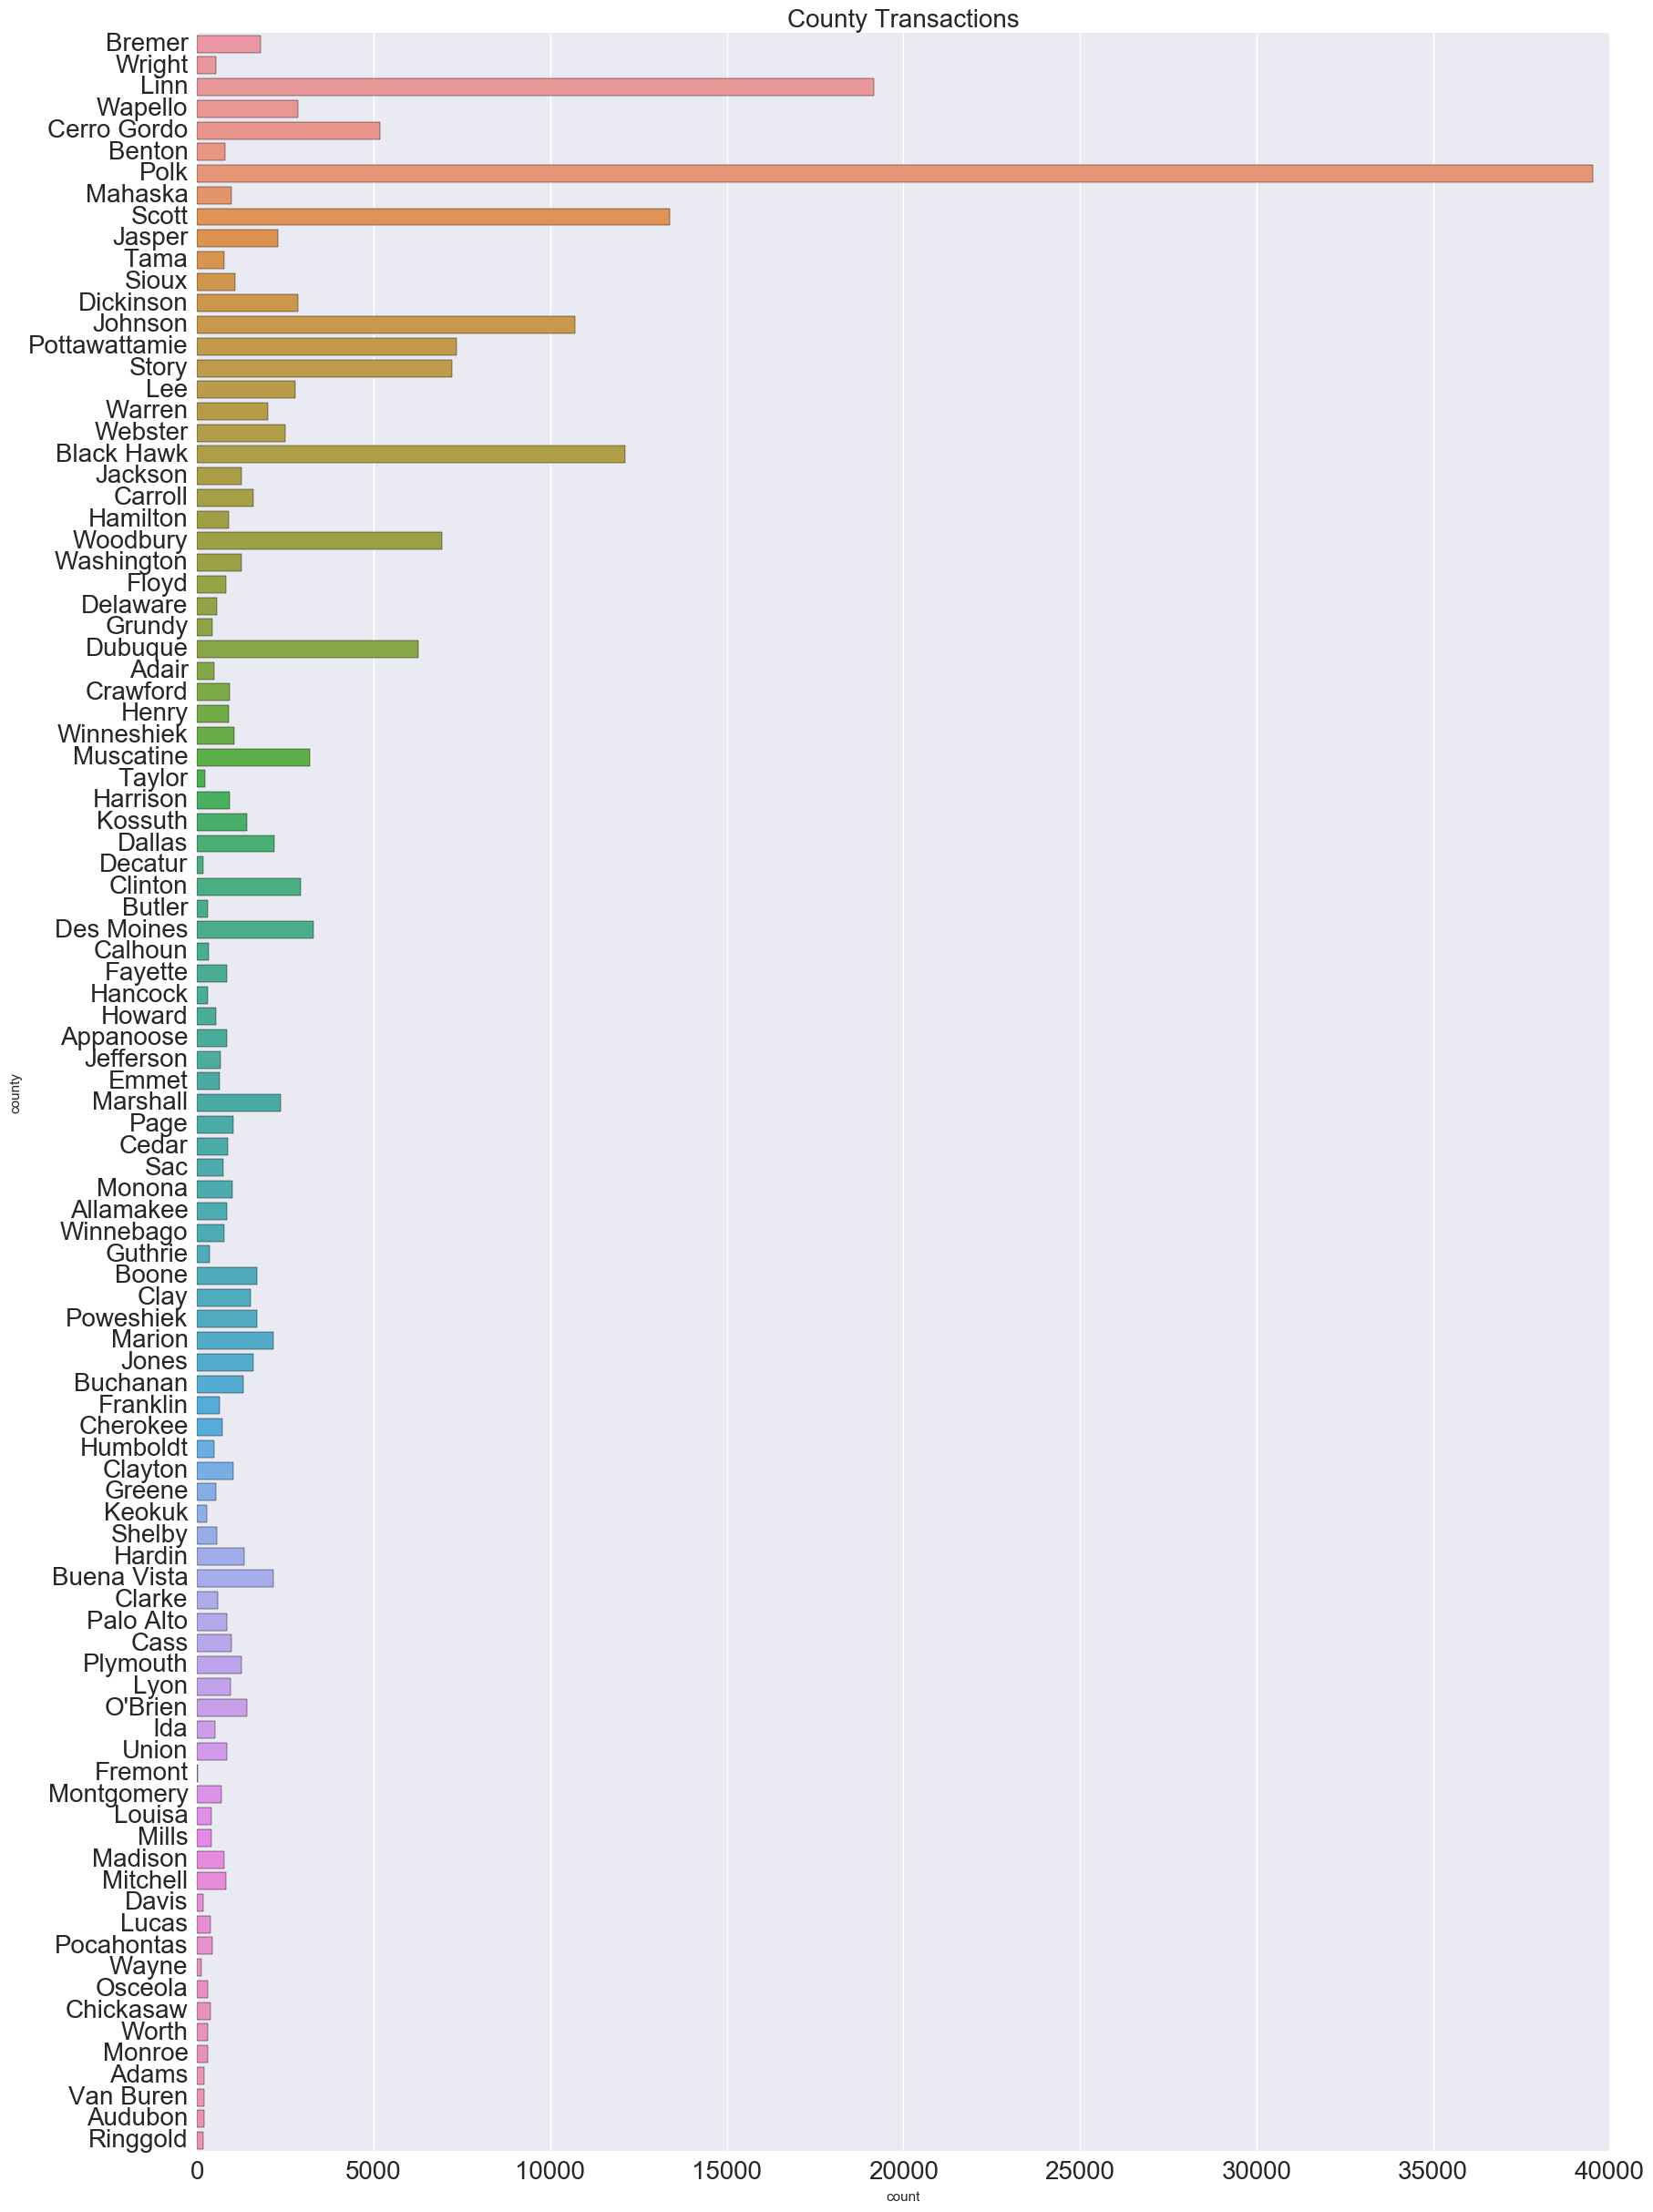

In [93]:
plt.figure(figsize=(20, 30))
b = sns.countplot(y='county',data=iowa_merge)
b.axes.set_title("County Transactions",fontsize=20)
#b.set_xlabel("X Label",fontsize=30)
#b.set_ylabel("Y Label",fontsize=20)
b.tick_params(labelsize=20)
#plt.xlim(0,14000)

## Sales by Zipcode

In [52]:
zipcode_sales = iowa_merge.groupby(['zip_code','city','county'], as_index=False)
zipcode_sales = zipcode_sales.agg({'sales_dollars': [np.sum,np.mean],
                                   'bottles_sold': np.sum,
                                   'margin': np.sum,
                                   'median_household_income': np.mean,
                                   'population': np.mean,
                                   'broad_category': np.max})

zipcode_sales.columns = [' '.join(col).strip() for col in zipcode_sales.columns.values]

In [53]:
zipcode_sales.head(15)

zip_code       city   county  bottles_sold sum  sales_dollars sum  \
0     50002      ADAIR    Adair               498            4958.04   
1     50003       ADEL   Dallas              2918           38095.16   
2     50006      ALDEN   Hardin               640           10086.97   
3     50009    ALTOONA     Polk             17953          241028.59   
4     50010       AMES    Story             53617          772044.25   
5     50014       AMES    Story              3083           40206.10   
6     50020      ANITA     Cass               704            8716.27   
7     50021     ANKENY     Polk             26546          417794.83   
8     50022   ATLANTIC     Cass              6849           93176.80   
9     50023     ANKENY     Polk             12093          179657.93   
10    50025    AUDUBON  Audubon              1153           13559.58   
11    50028     BAXTER   Jasper               171            2189.34   
12    50033  BEVINGTON  Madison               458            4582.04   
13    50035  BONDURANT     Polk               831            9664.23   
14    50036      BOONE    Boone             10573          141982.36   

    sales_dollars mean  median_household_income mean broad_category amax  \
0           134.001081                         45202             whiskey   
1           151.171270                         67037             whiskey   
2           103.989381                         44694             whiskey   
3           139.726719                         56094             whiskey   
4           136.091001                         48248             whiskey   
5           106.084697                         48248             whiskey   
6            69.730160                         40820             whiskey   
7           209.001916                         56094             whiskey   
8           111.722782                         40820             whiskey   
9            94.906461                         56094             whiskey   
10           78.834767                         42717             whiskey   
11           46.581702                         46396             whiskey   
12           76.367333                         53183             whiskey   
13           30.876134                         56094             whiskey   
14          122.822111                         49578             whiskey   

    margin sum  population mean  
0      1663.48             7682  
1     12734.43            66135  
2      3369.97            17534  
3     80566.24           430640  
4    258178.25            89542  
5     13423.74            89542  
6      2907.57            13956  
7    140000.28           430640  
8     31164.05            13956  
9     60094.78           430640  
10     4555.93             6119  
11      731.48            36842  
12     1529.42            15679  
13     3226.09           430640  
14    47756.71            26306

In [55]:
zipcode_sales.sort_values(['sales_dollars sum'], ascending=False).head()

zip_code          city   county  bottles_sold sum  sales_dollars sum  \
102    50320    DES MOINES     Polk             69398         1068200.95   
97     50314    DES MOINES     Polk             72142         1065906.06   
380    52402  CEDAR RAPIDS     Linn             75492          979420.46   
347    52240     IOWA CITY  Johnson             65478          875829.95   
4      50010          AMES    Story             53617          772044.25   

     sales_dollars mean  median_household_income mean broad_category amax  \
102          410.530726                         56094             whiskey   
97           292.429646                         56094             whiskey   
380          170.393260                         53674             whiskey   
347          176.507447                         51380             whiskey   
4            136.091001                         48248             whiskey   

     margin sum  population mean  
102   356316.11           430640  
97    355628.20           430640  
380   327428.12           211226  
347   292547.89           130882  
4     258178.25            89542

In [268]:
zipcode_sales.to_csv('zipcode_sales.csv',)

## Sales by City

In [170]:
city_sales = iowa_merge.groupby(['city'] , as_index=False)
city_sales = city_sales.agg({'sales_dollars': [np.sum,np.mean],
                                   'bottles_sold': np.sum,
                                   'margin': np.sum,
                                   'median_household_income': np.mean,
                                   'population': np.mean,
                                   'broad_category': np.max})

city_sales.columns = [' '.join(col).strip() for col in city_sales.columns.values]

In [171]:
city_sales.sort_values(['bottles_sold sum'], ascending=False).head(5)

city  bottles_sold sum  sales_dollars sum  sales_dollars mean  \
89     DES MOINES            279849         3583508.99          188.239165   
51   CEDAR RAPIDS            161377         2068540.60          135.066314   
80      DAVENPORT            123976         1395214.30          151.505516   
353      WATERLOO             97178          990727.88          146.731025   
172     IOWA CITY             75785         1020960.74          158.337584   

     median_household_income mean broad_category amax  margin sum  \
89                        56094.0             whiskey  1196497.39   
51                        53674.0             whiskey   691357.55   
80                        49964.0             whiskey   465929.13   
353                       44178.0             whiskey   330956.00   
172                       51380.0             whiskey   341074.17   

     population mean  
89          430640.0  
51          211226.0  
80          165224.0  
353         131090.0  
172         130882.0

In [288]:
city_sales.sort_values(['margin'], ascending=False).head(5)

bottles_sold  sales_dollars      margin  \
city                                                    
DES MOINES        279849.0     3583508.99  1196497.39   
CEDAR RAPIDS      161377.0     2068540.60   691357.55   
DAVENPORT         123976.0     1395214.30   465929.13   
IOWA CITY          75785.0     1020960.74   341074.17   
WATERLOO           97178.0      990727.88   330956.00   

              median_household_income broad_category  
city                                                  
DES MOINES                    56094.0        whiskey  
CEDAR RAPIDS                  53674.0        whiskey  
DAVENPORT                     49964.0        whiskey  
IOWA CITY                     51380.0        whiskey  
WATERLOO                      44178.0        whiskey

## Sales by Alcohol Category

In [53]:
brands = iowa_merge.groupby(['broad_category'], as_index=False)
brands = brands.agg({'bottles_sold': np.sum,
                     'sales_dollars': np.mean,

                     'margin': np.mean})

In [55]:
brands.sort_values('bottles_sold', ascending=False)

broad_category  bottles_sold  sales_dollars     margin
11          vodka        649059     120.549498  40.307314
12        whiskey        564827     150.652662  50.506358
6         liqueur        204413     139.414179  46.527344
8             rum        194930     158.008973  52.718171
5             gin        145911     101.053803  33.777969
3          brandy        121807      98.347350  32.823039
7            misc         94356     111.153601  37.248767
10        tequila         93320     159.825517  53.334882
9        schnapps         82360      89.600670  29.876146
0        amaretto         10350      71.764890  23.932388
4           creme          3028      36.894671  12.311713
1        anisette           106      28.325185   9.454815
2            beer             2     142.760000  47.590000

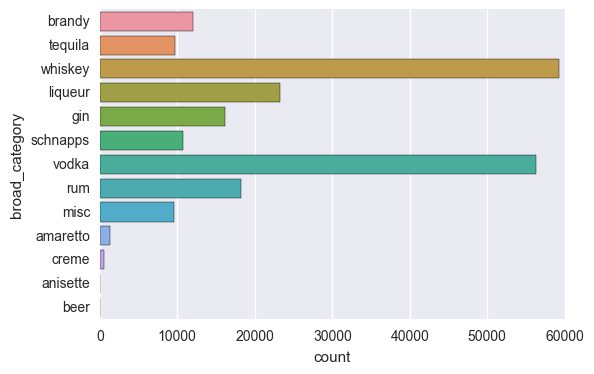

In [254]:
sns.countplot(y='broad_category', data=iowa_merge)

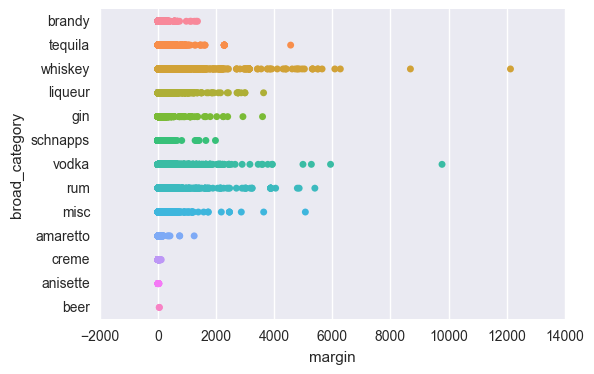

In [56]:
sns.stripplot(y='broad_category', x='margin', data=iowa_merge)

In [56]:
brands_quarter = iowa_merge.groupby(['quarter','broad_category'], as_index=False)
brands_quarter = brands_quarter.agg({'bottles_sold': np.sum,
                     'sales_dollars': np.sum,
                     'cost_per_liter': np.sum,
                     'cost_per_gallon': np.sum,
                     'margin': np.mean})

In [245]:
brands_quarter.sort_values(by='bottles_sold', ascending=False).head(10)

quarter broad_category  bottles_sold  sales_dollars  cost_per_gallon  \
22      Q2          vodka        175644     1844221.08      7359.465688   
34      Q3          vodka        170592     1761779.42      7273.066300   
48      Q4        whiskey        168436     2763002.55      5073.394740   
47      Q4          vodka        166561     1797142.59      6927.924372   
23      Q2        whiskey        138691     2170747.86      4222.993744   
10      Q1          vodka        136262     1378368.93      5843.935805   
11      Q1        whiskey        130633     2041862.27      4004.268331   
35      Q3        whiskey        127067     1953118.61      3799.478444   
42      Q4        liqueur         65687     1033120.75      1399.221462   
44      Q4            rum         53042      805130.48      1350.262593   

       margin  cost_per_liter  
22  42.085547    27849.911406  
34  39.559024    27523.015431  
48  57.304175    19200.803606  
47  42.588840    26217.486112  
23  49.113469    15982.175401  
10  36.577978    22114.096343  
11  49.593851    15154.489860  
35  45.169853    14378.522389  
42  52.306340     5294.274438  
44  56.647545     5110.002673

## Monthly Sales

In [246]:
iowa_merge['month'] = iowa_merge['date'].apply(lambda x: x.month)

In [230]:
monthly_brand_sales = iowa_merge.groupby(['month','county'], as_index=False)
monthly_brand_sales = monthly_brand_sales.agg({'bottles_sold': np.sum,
                     'sales_dollars': np.sum,
                     'cost_per_liter': np.sum,
                     'cost_per_gallon': np.sum,
                     'margin': np.mean                    
                    })

In [247]:
monthly_brand_sales.sort_values('sales_dollars', ascending=False).head()

month county  bottles_sold  sales_dollars  cost_per_gallon     margin  \
954      10   Polk         51042      778053.61      1518.661973  78.414244   
1150     12   Polk         46835      643951.50      1465.439400  51.983730   
563       6   Polk         44969      615408.62      1487.294880  56.057359   
368       4   Polk         43711      559501.95      1508.877370  56.819608   
1052     11   Polk         36787      513059.70      1152.149191  53.984661   

      cost_per_liter  
954      5747.078091  
1150     5545.316405  
563      5628.308595  
368      5710.056173  
1052     4359.984008

In [221]:
store_sales = iowa_merge.groupby(by=['store_number','city', 'county'], as_index=False)
# Compute sums, means
store_sales = store_sales.agg({'sales_dollars': np.sum,
                   'bottles_sold': np.sum,
                   'broad_category': np.max,
                   'cost_per_liter': 'mean',
                   })

In [222]:
store_sales.sort_values(by='sales_dollars', ascending=False).head()

store_number             city   county  bottles_sold  sales_dollars  \
125           2633       DES MOINES     Polk         62827      997924.42   
1027          4829       DES MOINES     Polk         52525      874664.18   
194           3385     CEDAR RAPIDS     Linn         27283      439584.35   
36            2512        IOWA CITY  Johnson         27686      419534.61   
199           3420  WINDSOR HEIGHTS     Polk         20778      348837.36   

      cost_per_liter broad_category  
125         4.026710        whiskey  
1027        3.502454        whiskey  
194         8.681619        whiskey  
36          2.588321        whiskey  
199         8.823083        whiskey

In [223]:
store_sales.sort_values(by='bottles_sold', ascending=False).head()

store_number             city   county  bottles_sold  sales_dollars  \
125           2633       DES MOINES     Polk         62827      997924.42   
1027          4829       DES MOINES     Polk         52525      874664.18   
36            2512        IOWA CITY  Johnson         27686      419534.61   
194           3385     CEDAR RAPIDS     Linn         27283      439584.35   
199           3420  WINDSOR HEIGHTS     Polk         20778      348837.36   

      cost_per_liter broad_category  
125         4.026710        whiskey  
1027        3.502454        whiskey  
36          2.588321        whiskey  
194         8.681619        whiskey  
199         8.823083        whiskey

# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

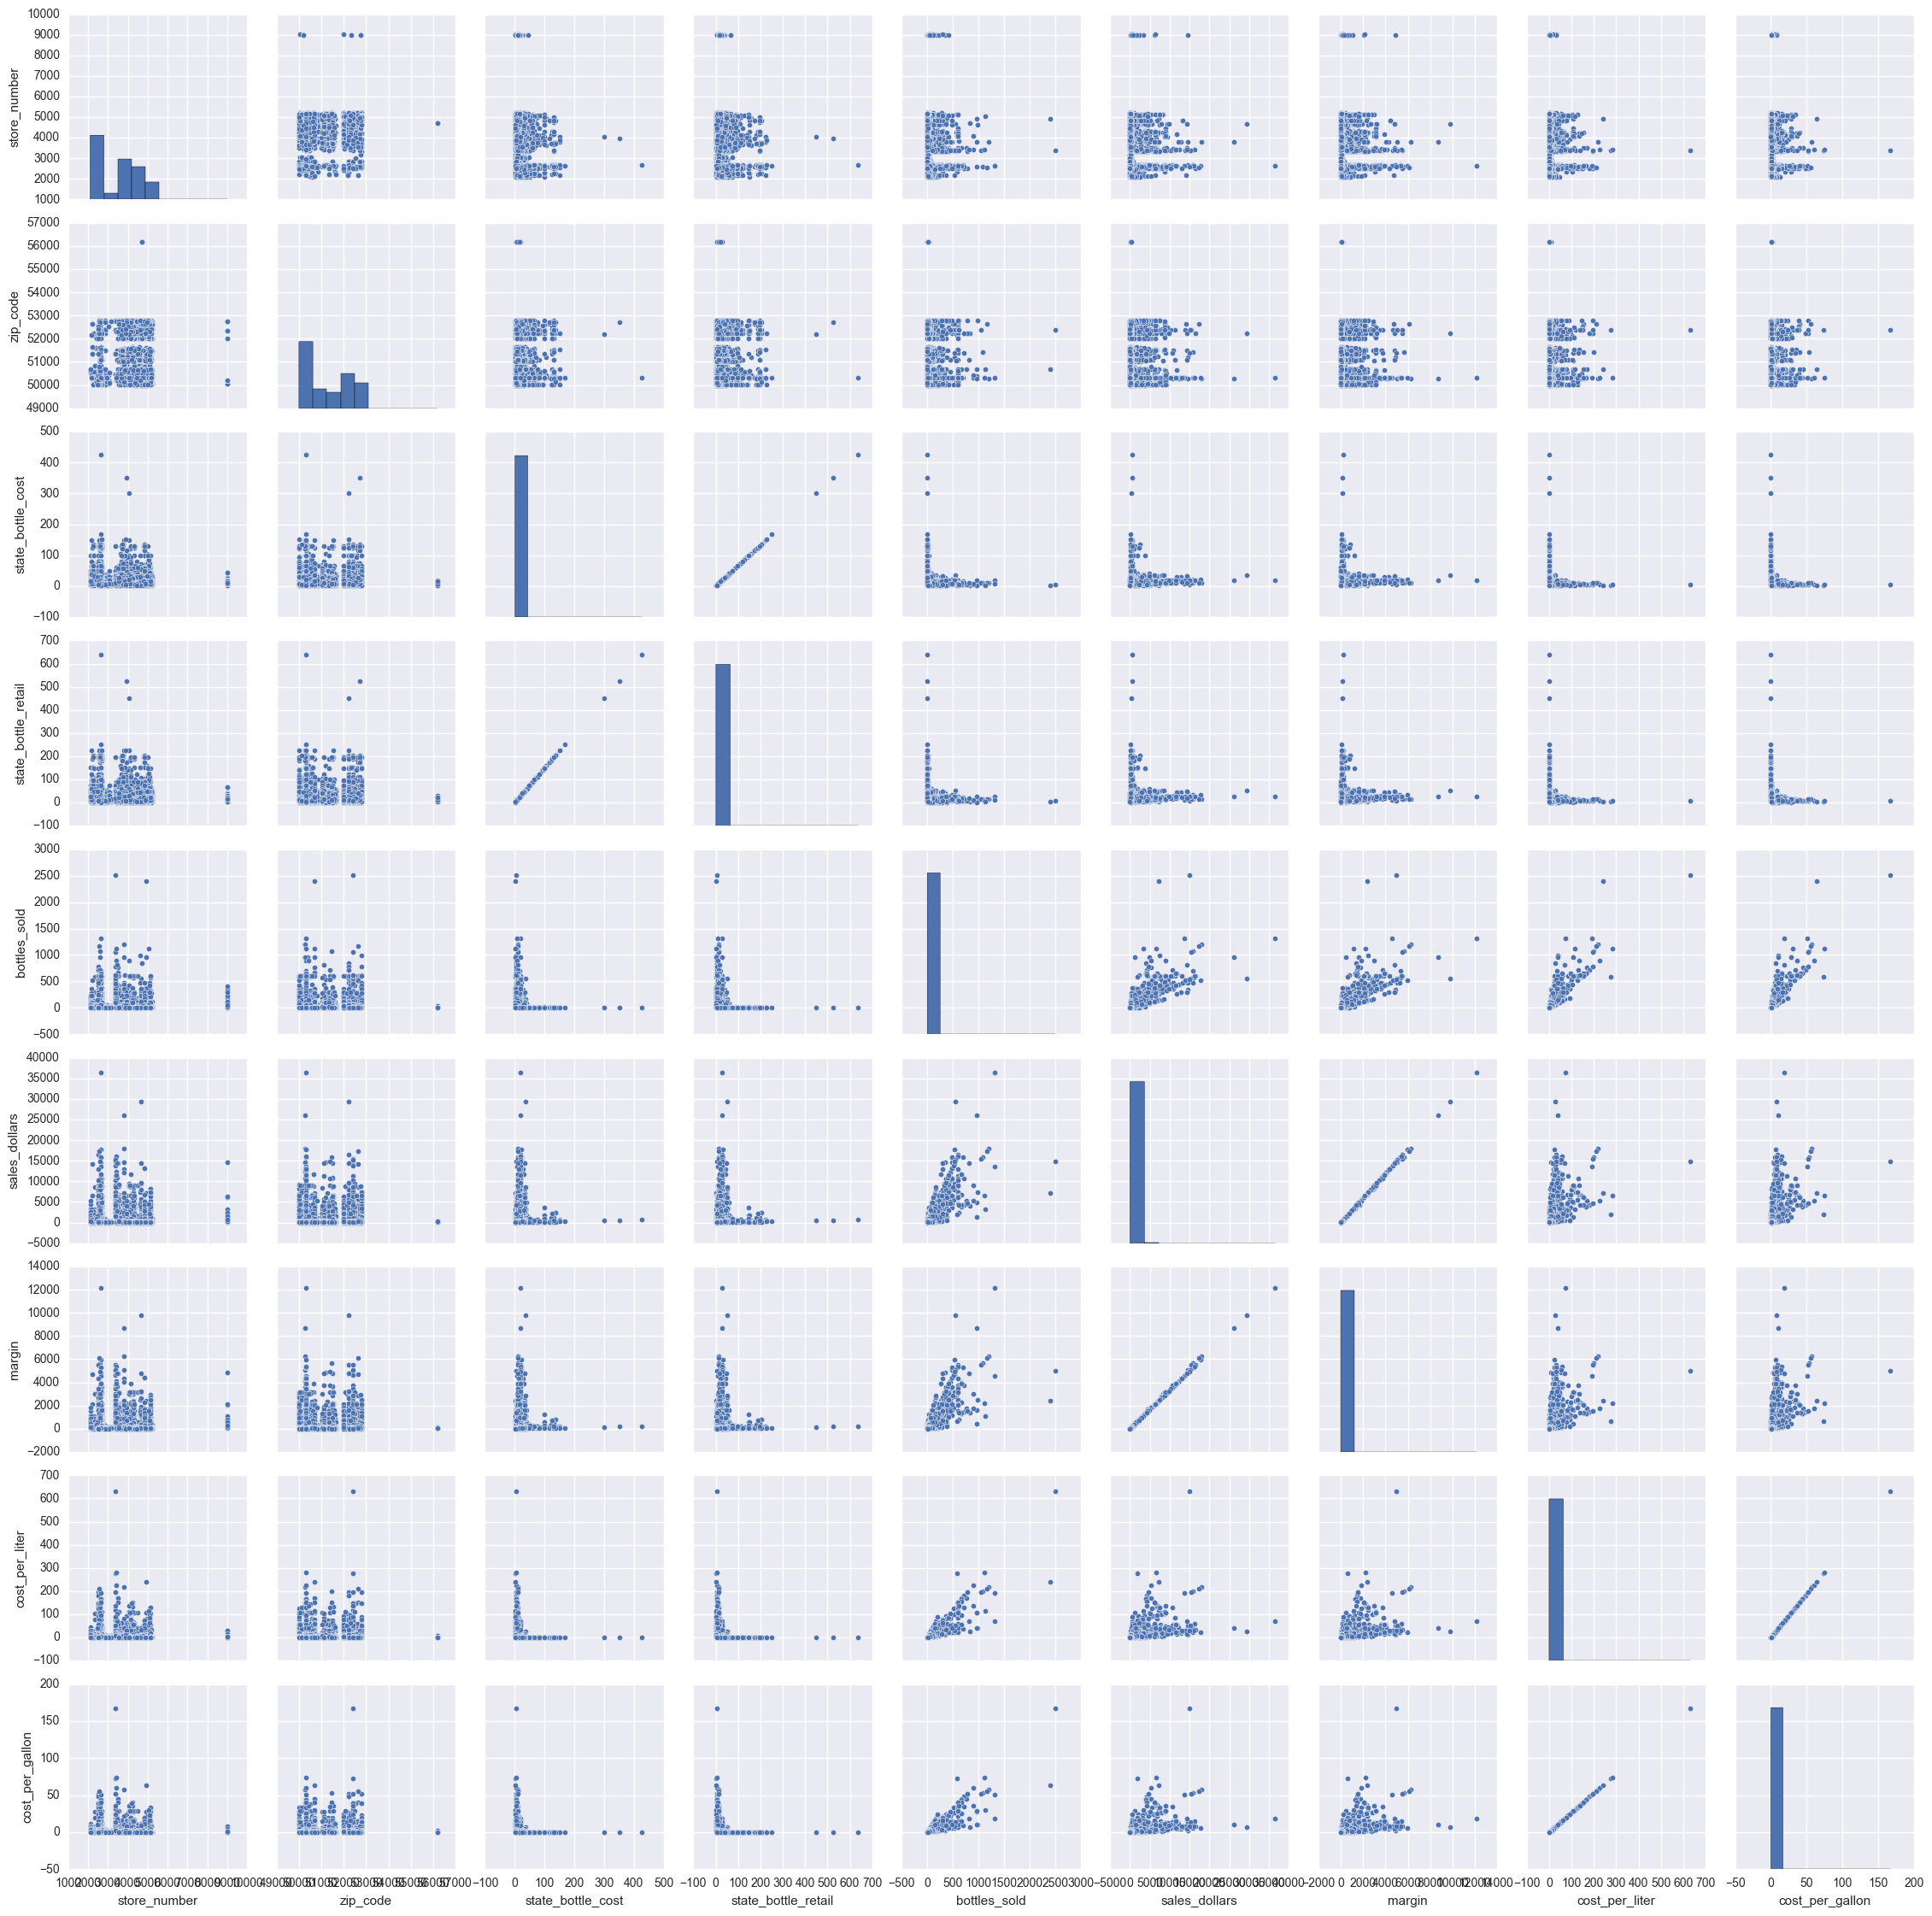

In [364]:
sns.pairplot(min_df)

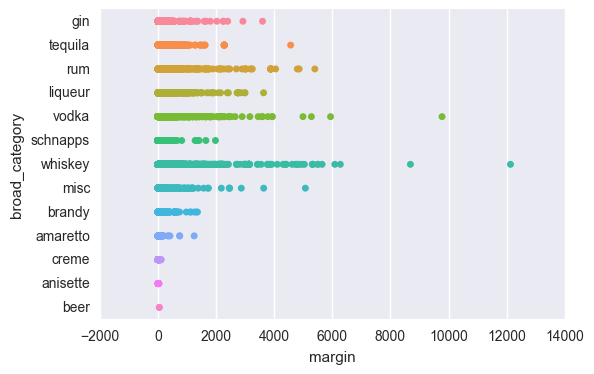

In [515]:
sns.stripplot('margin', 'broad_category',  data=min_df)

In [269]:
store_2633 = iowa_merge[iowa_merge['store_number'] == 2633]

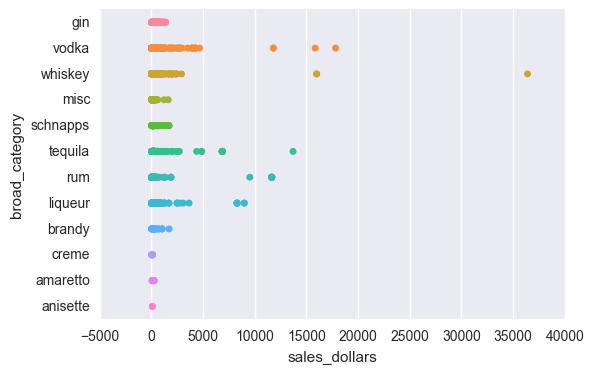

In [273]:
sns.stripplot(x='sales_dollars', y='broad_category', data=store_2633)

In [394]:
top_store = store_2633.groupby(['store_number','broad_category'])
top_store = top_store.agg({'sales_dollars': np.sum,
                   'bottles_sold': np.sum,
                   'cost_per_liter': 'mean',
                   'margin': np.sum
                   })

In [395]:
top_store.sort_values(by='bottles_sold', ascending=False)

bottles_sold  sales_dollars    margin  \
store_number broad_category                                          
2633         vodka                16505.0      238556.44  79597.71   
             tequila              10539.0      149244.12  49755.58   
             whiskey               9329.0      204119.95  68085.95   
             rum                   7857.0      133576.97  44550.65   
             liqueur               6629.0      139652.49  46591.48   
             gin                   4882.0       56489.66  18834.75   
             schnapps              3448.0       44873.91  14959.61   
             misc                  2621.0       15058.49   5028.81   
             brandy                 583.0       12632.33   4218.47   
             amaretto               276.0        2630.76    877.56   
             creme                  134.0         918.18    306.18   
             anisette                24.0         171.12     57.12   

                             cost_per_liter  
store_number broad_category                  
2633         vodka                 5.004284  
             tequila               7.534996  
             whiskey               2.169046  
             rum                   4.317831  
             liqueur               1.931644  
             gin                   4.753176  
             schnapps              3.008710  
             misc                  7.795594  
             brandy                1.120340  
             amaretto              2.980787  
             creme                 1.693657  
             anisette              1.894737

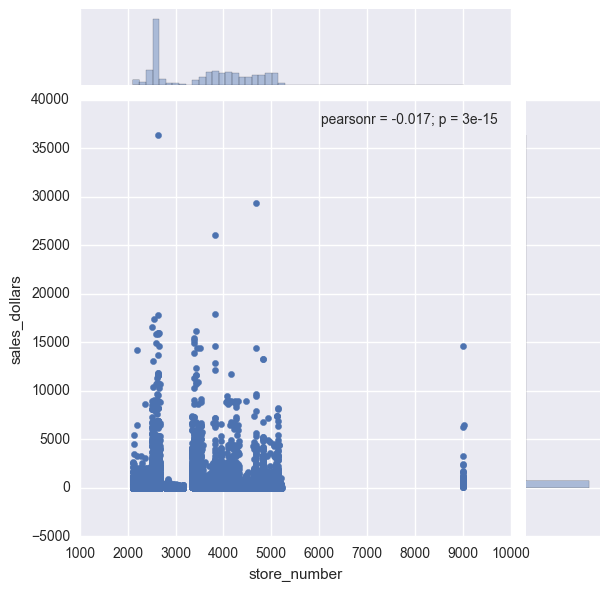

In [242]:
sns.jointplot(x='store_number', y='sales_dollars', data=iowa_merge )

## Record your findings

Be sure to write out anything observations from your exploratory analysis.

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, SGDRegressor
from sklearn.preprocessing import StandardScaler

In [97]:
import statsmodels.formula.api as smf

In [161]:
#smf.ols('sales_dollars ~ bottles_sold + median_family_income + population + per_capita_income + number_of_households', data=iowa_merge).fit().summary()
smf.ols('sales_dollars ~ bottles_sold + median_family_income + population + per_capita_income + number_of_households', data=iowa_merge).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          sales_dollars   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                 7.594e+04
Date:                Mon, 09 Jan 2017   Prob (F-statistic):               0.00
Time:                        18:16:39   Log-Likelihood:            -1.4801e+06
No. Observations:              217247   AIC:                         2.960e+06
Df Residuals:                  217240   BIC:                         2.960e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------
Intercept                         -22.2967      7.528     -2.962      0.003       -37.052    -7.542
bottles_sold                       13.0043      0.019    673.367      0.000        12.966    13.042
median_family_income               -0.0002      0.000     -1.666      0.096        -0.001  4.14e-05
population                          0.0008      0.000      3.277      0.001         0.000     0.001
median_family_income:population  1.076e-08   1.12e-09      9.591      0.000      8.56e-09   1.3e-08
per_capita_income                   0.0018      0.000      4.098      0.000         0.001     0.003
number_of_households               -0.0040      0.001     -7.114      0.000        -0.005    -0.003
==============================================================================
Omnibus:                   311611.316   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      38728269280.684
Skew:                           6.759   Prob(JB):                         0.00
Kurtosis:                    2071.395   Cond. No.                     2.29e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

In [181]:
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, SGDRegressor, ElasticNet
from sklearn.preprocessing import StandardScaler

iowa_data = iowa_merge[['bottles_sold','median_family_income','population','per_capita_income','number_of_households']]
iowa_target = iowa_merge['sales_dollars']

def load_data_and_split():
    #iowa_data = iowa_merge[['bottles_sold','median_family_income','population','per_capita_income','number_of_households']]
    #iowa_target = iowa_merge['sales_dollars']
    X_train, X_test, y_train, y_test = train_test_split(iowa_data, iowa_target, random_state=42)
    return X_train, X_test, y_train, y_test

In [201]:
X_train, X_test, y_train, y_test = load_data_and_split()

ridge_regressor = Ridge()

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

ridge_regressor.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [207]:
feature_names = iowa_data.columns.tolist()
ridge_coef = zip(feature_names, ridge_regressor.coef_)
ridge_intercept = ridge_regressor.intercept_
print ridge_coef
print ridge_intercept 

[('bottles_sold', 325.72135608234282), ('median_family_income', 2.2224495917745548), ('population', 284.14944867432013), ('per_capita_income', 5.7686702925607243), ('number_of_households', -289.07974382526743)]
130.648903428


In [202]:
def score_me(scorer, model, X, y):
    return scorer(model.predict(X), y)

print("MAE train {}".format(score_me(mean_absolute_error, ridge_regressor, X_train, y_train)))
print("MAE test  {}".format(score_me(mean_absolute_error, ridge_regressor, X_test,  y_test)))
print("MSE train {}".format(score_me(mean_squared_error, ridge_regressor, X_train, y_train)))
print("MSE test  {}".format(score_me(mean_squared_error, ridge_regressor, X_test,  y_test)))
print("R2  train {}".format(score_me(r2_score, ridge_regressor, X_train, y_train)))
print("R2  test  {}".format(score_me(r2_score, ridge_regressor, X_test,  y_test)))

MAE train 64.8704938145
MAE test  64.508462437
MSE train 47231.9716689
MSE test  52414.7940145
R2  train 0.555117628116
R2  test  0.523204328174


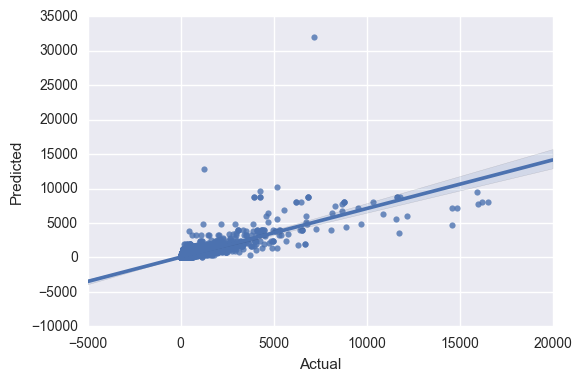

In [206]:
sns.regplot(y_test, ridge_regressor.predict(X_test))
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

# Conclusion

### Using the original dataset I was only able to extract conclusion that support top performing alcohol categories as well as top counties, zip codes and stores. The dataset does not provide enough time data to support a predictive seasonal model. 

### After importing and merging the Iowa Census data I was able to find provide some decent R-squared scores and a good traning set for sales in dollars. The features used (median_family_income, population, per_capita_income and number_of_households) provided the best predictive model for location selection. 

### Without further data on commercial property values, I would not feel comfortable predicting the most profitable location with the models. 

# Highlights 

### Vodka is the top seller for most of the year with the exception of Whiskey in Q4.
### Polk county does the most in sales primarly due to population 
### Whiskey provides the highest value in terms of margin. This is most likely due to the high end craft style selections that demand a higher retail price.
### Tequila sells well but yields a lower margin